In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt #used for plots
import cmath as cm    #used for complex arithmetic

(Complex Potentials and Contaminant Flow)=
# JNB LAB: Complex Potentials and Contaminant Flow 

## 1. Complex Potentials

### Introduction

In this section, we  model 2-dimensional incompressible flow in various settings using the complex potential 

$\Omega=\Phi(x,y)+i\Psi(x,y)$,

where $\Phi(x,y)$ is the velocity potential $\vec{V}=-\nabla \Phi(x,y)$ and $\Psi(x,y)$ is the stream function. The equipotentials are the level curves for the velocity potential:  $\Phi(x,y)= constant$. The streamlines for the flow are the level curves for the stream function: $\Psi(x,y)=constant$. 

We assume throughout that unless stated otherwise,
<ul>
    <li> our domain is the square with vertices (1,1),(-1,1),(-1,-1), and (1,-1).
    <li> if there are no transformations of the plane, obstructions to the flow, or singularities such as sources or sinks, flow is in the horizontal direction.
    </ul>
    


### Uniform Flow

Uniform flow means flow is in one direction (eg. in the $x$ direction with the cross-sectional area $A$ created by a depth h is constant). The flow rate $q_u$ ($\frac{m^3}{s}$) and fluid velocity $V_x=q_u/A$ are constant at all points. In this case, Darcy's Law becomes
  
  $V_x=\frac{q_u}{A}  =-\frac{d\Phi}{dx}$.

Integrating, we get

$\Phi(x)= -\frac{q_u}{A} x + \Phi_0$. 

For example, set $-\frac{q_u}{A}=1$ and $\Phi_0=0$.  Since $\psi_y(x,y)=\Phi_x=-1$, we let $\psi(x,y)=-y$ and so the complex potential is $\Omega(x,y)=-x-iy$ or   $\Omega(z)=-z$.

Here is a plot of uniform flow.

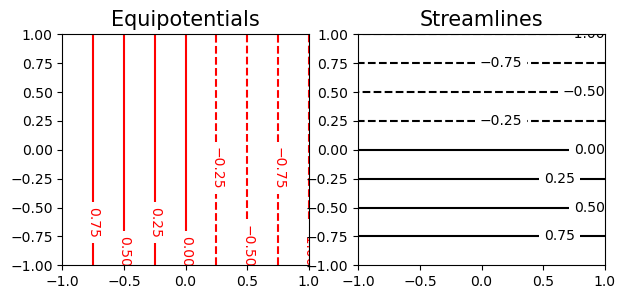

In [2]:
# create figure and axes
fig=plt.figure(figsize=(7,3))
plt.xlim=(-1,2)
plt.ylim=(-1,2)
# Set up Plot Grid
x = np.linspace(-1, 1, 250)
y = np.linspace(-1, 1, 250)
X, Y = np.meshgrid(x, y)

#Plot the equipotential lines
ax1 = fig.add_subplot(121)
ax1.set_title('Equipotentials',size=15)
plt.gca().tick_params(labelsize=10)
Z = -X
contours=plt.gca().contour(X, Y, Z, levels=np.linspace(-1,1,9), colors='red');
plt.gca().clabel(contours, inline=True, fontsize=10)

#Plot the streamlines
ax2 = fig.add_subplot(122)
ax2.set_title('Streamlines',size=15)
plt.gca().tick_params(labelsize=10)
Z = -Y
contours=plt.contour(X, Y, Z, levels=np.linspace(-1,1,9), colors='black');
plt.gca().clabel(contours, inline=True, fontsize=10)
plt.savefig('UniformFlow.png')

### Source

A source at (0,0) can be modelled by the complex potential
$\Omega(z)=\log(z)=\ln(|z|) + i arg(z)$ where $-\pi < arg(z)\le \pi$. 

In this case the velocity potential is     

$\Phi(z)= \ln \mid z\mid=\sqrt{x^2+y^2}$ 
    
and the stream function is 

$\Psi(z)=arg(z)=\arctan(y/x)$

### Five-Spot Pattern

In the 5 point pattern we will surround the source with 4 equal strength sinks ($q_w/h=1$) at the four corners of the domain ((1,1),(-1,1),(-1,1),(1,-1)). In this case, 

<ul>
<li>the complex potential is

$\Omega(z) =\frac{-1}{2\pi}[\log(z)-\log(z-(1+i))-\log(z-(1-i))-\log(z-(-1-i))-\log(z-(1-i))$]

<li> the velocity potential is
    
   $ \Phi(z)= \frac{-1}{2\pi}[\ln(\sqrt{x^2+y^2})-\ln(\sqrt{(x-1)^2+(y-1)^2})-\ln(\sqrt{(x-1)^2+(y+1)^2})-\ln(\sqrt{(x+1)^2+(y+1)^2})-\ln(\sqrt{(x-1)^2+(y+1)^2})]$
   
   <li> the stream function is
    
   $ \Psi(z)= \frac{-1}{2\pi}[\arctan\frac{y}{x}-\arctan\frac{y-1}{x-1}-\arctan\frac{y+1}{x-1}-\arctan\frac{y+1}{x+1}-\arctan\frac{y+1}{x-1}]$
   



### Exercises

```{admonition} Exercise 1
a) Make a plot of a source at (0,0) with complex potential
$\Omega(z)=\log(z)=\ln(|z|) + i arg(z)$ where $-\pi < arg(z)\le \pi$. 

b)  Make a plot  for one quarter of a 5-spot pattern which consider the terms in the potential for just the source at (0,0) and a sink at (1,1):
  
  $\Omega(z) =\frac{-1}{2\pi}[\log(z)-\log(z-(1+i))$]
  
  Hint:  The stream function, which accounts for the choice of branch cuts (negative x-axis at the branch point (0,0) and in the direction of the positive x-axis at the branch point (1,1), can be evaluated as
   
  $ \Psi(x,y)= \frac{-1}{2\pi}[\pi+\arctan(\frac{y}{x})]+\frac{1}{2\pi}[2\pi-\arccos(\frac{X-1}{\sqrt{(X-1)^2+(Y-1)^2}})]$
   

```

## 2. Fischer-Calo Contaminant Model

### Setting the Scene

The Fisher-Calo Superfund Site is located in the multiple square-mile Kingsbury Industrial Development Park (KIDP) in La Porte County, Indiana. Two communities, Kingsbury and Kingsford Heights are located within 2 miles of KIDP. An industrial chemical processing and distribution facility operated on that site.  Fisher-Calo Chemicals and Solvent Company and various subsidiaries began operations at KIDP in the early 1970s, with wastes buried on-site in thousands of drums. Spills, leakage, and a large fire in March 1978 resulted in the contamination of soil and groundwater with polychlorinated biphenyls (PCBs) and volatile organic compounds (VOCs). The contamination has spread from the source due to groundwater flow, and thus the contaminant source is not a mathematical source per se. The site's long-term remedies include:

    - excavation, consolidation, and offsite disposal of 3,600 drums (1994-1996);
    - soil source area remediation via excavation and off site disposal of PCB  impacted soils, soil vapor extraction (SVE), and bio-venting of semi-volatile organic compound (SVOC) impacted soils, and SVE of volatile organic compound (VOC) impacted soils (1996-2001); and
    - groundwater extraction and treatment (1998-present) with partial Pilot Study evaluation of enhanced monitored natural attenuation (2020-present).
    
The EPA conducts 5 year reviews to monitor and evaluate adherence to planned operations. 



Math modeling was used to support the goal to design an effective contaminant extraction well remediation  system. Such a system includes both pollutant extracting wells (EW) and plume monitoring wells (MW), and is the traditional remediation approach. The Fischer-Calo Groundwater Extraction and Treatment System consisting of 16 extraction wells (EWs) began operating in Feb 1998. More than four different contaminated groundwater plumes were identified. We focus on one of these plumes, called the Space Leasing plume.   



	
 A rough approximation of the main Fisher-Calo Space Leasing plume boundary is shown encircled in the long bold oval. For this plume, one extraction well (EWSL-2) is located mid-plume, and a second extraction well (EWSL-4) downstream at the plume's bottom right.  
 

 <img src="fig1a.png" width="800px"> 




 Groundwater direction arrows are orthogonal to the lines of equipotential.  Figure Credit:  [U.S. Environmental Protection Agency 2020] 

 <img src="fig1b.png" width="800px"> 


Groundwater at Space Leasing is present in the shallow, unconfined sand aquifer with a saturated thickness of approximately 48 to 58 feet.  The direction of groundwater flow is to the southeast at an approximate horizontal hydraulic gradient of 0.002 ft/ft under 2019 pumping conditions.  Groundwater in the Space-Leasing plume is impacted with chlorinated volatile organic compounds (CVOC), including trichloroethene (TCE), tetrachloroethene (PCE), and cis-1,2-Dichloroethene (cis-1,2-DCE) at concentrations greater than action levels in the upper half of the unconfined aquifer.  The extent of the CVOC plume at Space-Leasing is approximately 150 feet wide by approximately 1,750 feet long and is oriented in the northwest to southeast direction.


 Our model is based on 2019 data for the Space Leasing Plume remediation [U.S. Environmental Protection Agency 2020]  which involved a pump and treat system with two extraction wells, one mid-plume (EWSL-2), and the other at the down-stream end (EWSL-4). We considered the following modeling problem:

    Assess the containment of above action level contaminant at monitoring wells by the two extraction wells (EWSL-2, EWSL-4).
      


Our model utilizes the beauty and ingenuity of complex variables to analyze 2-dimensional groundwater flow.  Sato's wonderful book   Complex Analysis for Practical Engineering [Sato 2015] provides complete background for our approach. 

(slp)=
### Model


We model the Space-Leasing Plume's pollution extraction system using a complex potential of the form

$$\Omega(z)=k_0z + k_1\log(z-z_{EWSL-2})+ k_2\log(z-z_{EWSL-4})+ C.$$

where $x_{EWSL-2}=0$ and $x_{EWSL-4}=10.8$ are the positions of the two extraction wells located on a horizontal axis. $C=\Phi_0$ is a real constant. We determine the coefficients as follows:

Based on the equipotential map for the SL plume, we set the baseline potential at $\Phi_0=717$, so $C=717$.

Since the strengths of the mid-plume and downstream extraction wells are in a 3:2 ratio, we let $k_1=3k$ and $k_2=2k$. We call $k$ the extraction well strength parameter. It follows that the velocity potential has the form
    
 $$
 \Phi(z)=\Phi(x+iy)=k_0 x + +3k\ln(\mid z-z_{EWSL-2}\mid)+2k\ln(\mid z-z_{EWSL-4}\mid)+717.
 $$
    
Under the assumption of constant uniform flow, if we estimate $k_0$ using two vertical equipotentials, one at $x=x_1$ with value $\Phi_1$ and one at $x_1+d$ with value $\Phi_2$, then $k_0x_1 =\Phi_1$and $k_0(x_1+d)=\Phi_2\Rightarrow$  $k_0\approx\frac{\Phi_2-\Phi_1}{d}.$  Using process on three equipoentials and averaging, we obtained the estimate $k_0\approx -.145.$

We thus assume that $\Phi(z)=\Phi(x+iy)=-.145 x + 3k\ln(\mid z\mid)+2k\ln(\mid z-10.8\mid) + 717$, 

Due to the nature of appoximating the values of $k_0$ and $k$, we perform a sensitive analysis which reveals the different types of behavior that can be observed for vatious choices of $k$.

<b>Case 1:  Ineffective System </b>

($k=k_{ave}\approx .16)$

In this case, the well-extraction system does not capture all the streamlines emanating from above action level positions.

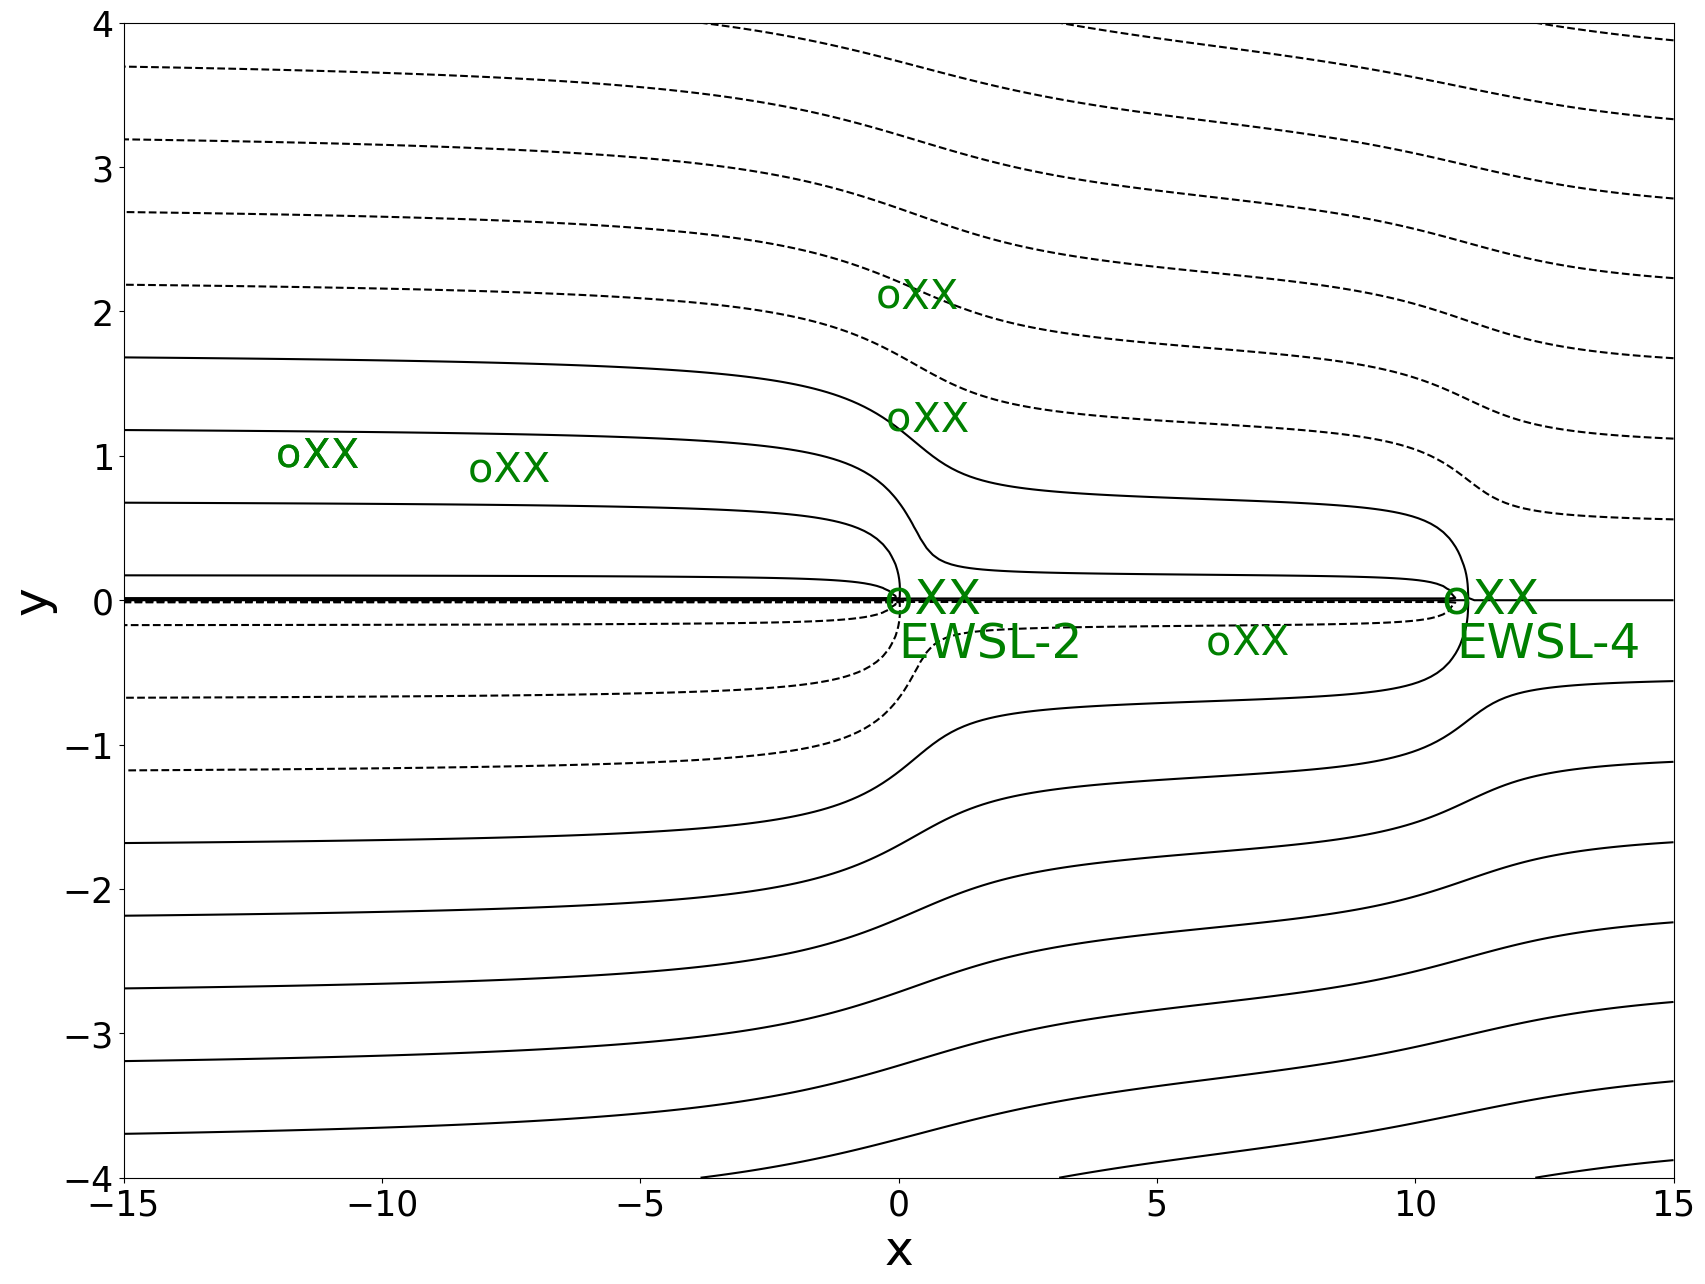

In [3]:
plt.figure(figsize=(20,15))
x = np.linspace(-15, 15, 250)
y = np.linspace(-4, 4, 250)
plt.xlim=[-15, 15]
plt.ylim=[-4,4]
k=.16
k0=-.145
c=717
X, Y = np.meshgrid(x, y)
#Z = k0*X+.3*k*.5*np.log(Y**2+X**2)+.2*k*.5*np.log(Y**2+(X-10.8)**2)+c
#contours=plt.contour(X, Y, Z, levels=np.linspace(700,800,600), colors='red')
Z1 = k0*Y+.3*k*np.arctan2(Y,X)+.2*k*np.arctan2(Y,(X-10.8))
contours1=plt.contour(X, Y, Z1, levels=np.linspace(-10,20,400), colors='black')
plt.gca().tick_params(labelsize=25)

#plot action level (XX) locations
plt.text(0,0,' XX',fontsize=35,color='g', verticalalignment='center')
plt.text(0,0,'o',fontsize=35,color='g', verticalalignment='center',horizontalalignment='center')
plt.text(0,1.25,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(0,1.25,'o',fontsize=30,color='g', verticalalignment='center',horizontalalignment='center')
plt.text(-.2,2.1,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(-.2,2.1,'o',fontsize=30,color='g', verticalalignment='center',ha='center')
plt.text(6.2,-.3,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(6.2,-.3,'o',fontsize=30,color='g', verticalalignment='center',ha='center')
plt.text(-8.1,.9,'o',fontsize=30,color='g', verticalalignment='center',ha='center')
plt.text(-8.1,.9,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(-11.8,1,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(-11.8,1,'o',fontsize=30,color='g', verticalalignment='center',ha='center')
plt.text(-11.8,1,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(-11.8,1,'o',fontsize=30,color='g', verticalalignment='center',ha='center')
plt.text(10.8,0,' XX',fontsize=35,color='green', verticalalignment='center')
plt.text(10.8,0,'o',fontsize=35,color='green', verticalalignment='center',ha='center')
#add labels
plt.xlabel('x',size='35')
plt.ylabel('y',size='35')
plt.text(0,-.4,'EWSL-2',fontsize=35,color='g')
plt.text(10.8,-.4,'EWSL-4',fontsize=35,color='green')
plt.xlabel('x',size='35')
plt.ylabel('y',size='35')
plt.savefig('Ineffectiveystem.png')

<b> Case 2:  Regular System </b>

($k\approx .4)$

In this case, both the mid-plume well (EWSL-2) and the downstream extraction well EWSL-4 capture streamlines emanating from above action level positions. All targeted pollutant is captured by the 2 wells.

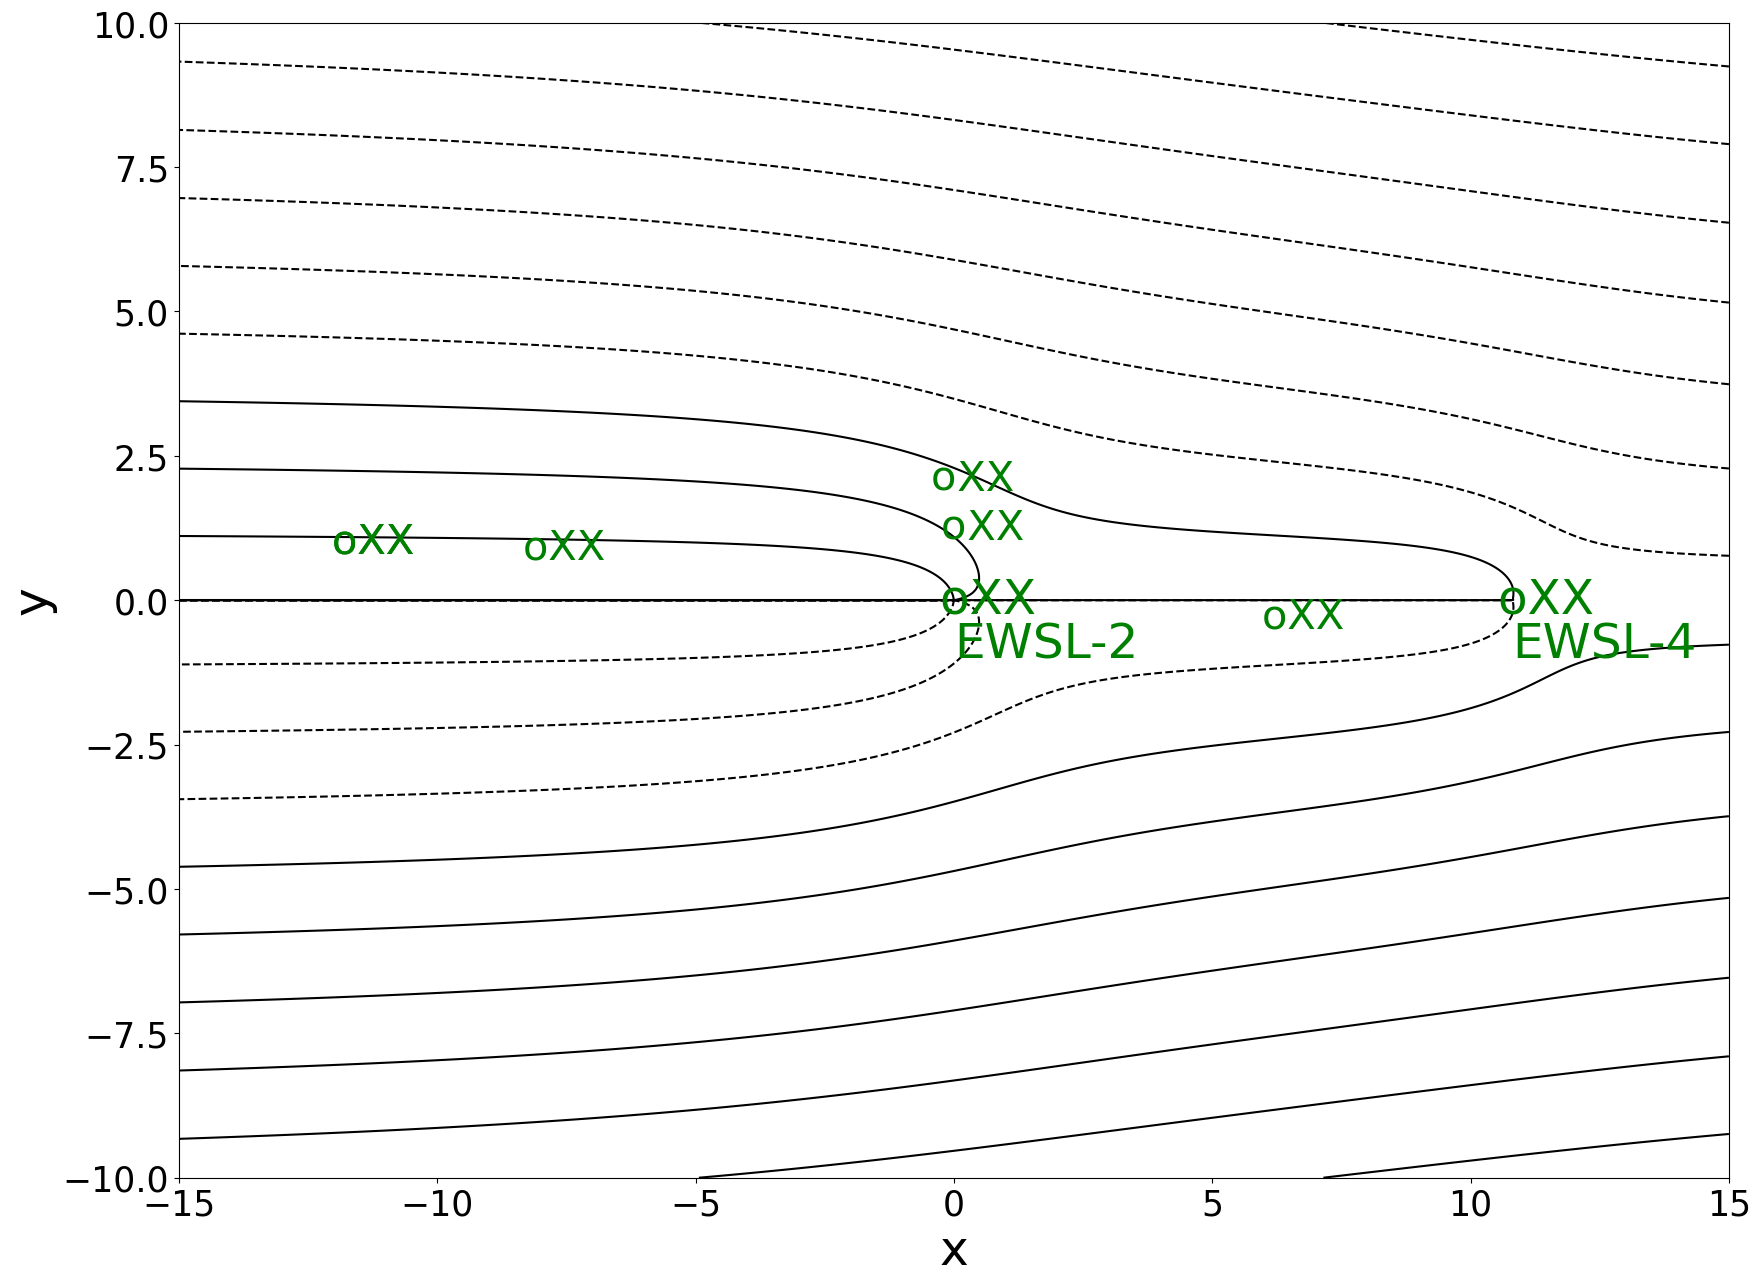

In [4]:
plt.figure(figsize=(20,15))
x = np.linspace(-15, 15, 500)
y = np.linspace(-10, 10, 2000)
plt.xlim=[-15, 15]
plt.ylim=[-10,10]
k=.4
k0=-.145
k1=-.5
c=717
X, Y = np.meshgrid(x, y)
#Z = k0*X+.3*k*.5*np.log(Y**2+X**2)+.2*k*.5*np.log(Y**2+(X-10.8)**2)+c
#contours=plt.contour(X, Y, Z, levels=np.linspace(700,800,600), colors='red')
Z1 = k0*Y+.3*k*np.arctan2(Y,X)+.2*k*np.arctan2(Y,(X-10.8))
contours1=plt.contour(X, Y, Z1, levels=np.linspace(-200,200,2200), colors='black')
plt.gca().tick_params(labelsize=25)
#plot action level (XX) locations
plt.text(0,0,' XX',fontsize=35,color='g', verticalalignment='center')
plt.text(0,0,'o',fontsize=35,color='g', verticalalignment='center',horizontalalignment='center')
plt.text(0,1.25,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(0,1.25,'o',fontsize=30,color='g', verticalalignment='center',horizontalalignment='center')
plt.text(-.2,2.1,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(-.2,2.1,'o',fontsize=30,color='g', verticalalignment='center',ha='center')
plt.text(6.2,-.3,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(6.2,-.3,'o',fontsize=30,color='g', verticalalignment='center',ha='center')
plt.text(-8.1,.9,'o',fontsize=30,color='g', verticalalignment='center',ha='center')
plt.text(-8.1,.9,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(-11.8,1,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(-11.8,1,'o',fontsize=30,color='g', verticalalignment='center',ha='center')
plt.text(-11.8,1,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(-11.8,1,'o',fontsize=30,color='g', verticalalignment='center',ha='center')
plt.text(10.8,0,' XX',fontsize=35,color='green', verticalalignment='center')
plt.text(10.8,0,'o',fontsize=35,color='green', verticalalignment='center',ha='center')
#add labels
plt.xlabel('x',size='35')
plt.ylabel('y',size='35')
plt.text(0,-1.,'EWSL-2',fontsize=35,color='g')
plt.text(10.8,-1.,'EWSL-4',fontsize=35,color='green')
plt.savefig('Regularsystem.png')

<b>Case 3  Ineffecient System </b>

($k\approx 1)$

In this case, the down-stream well (EWSL-4) can capture all the streamlines emanating from above action level positions rendering the mid-plume well (EWSL-2) unnecessary (the strength of the downstream well EWSL-2 is reduced to 0 in order to show the streamlines that can be captured by EWSL-4).

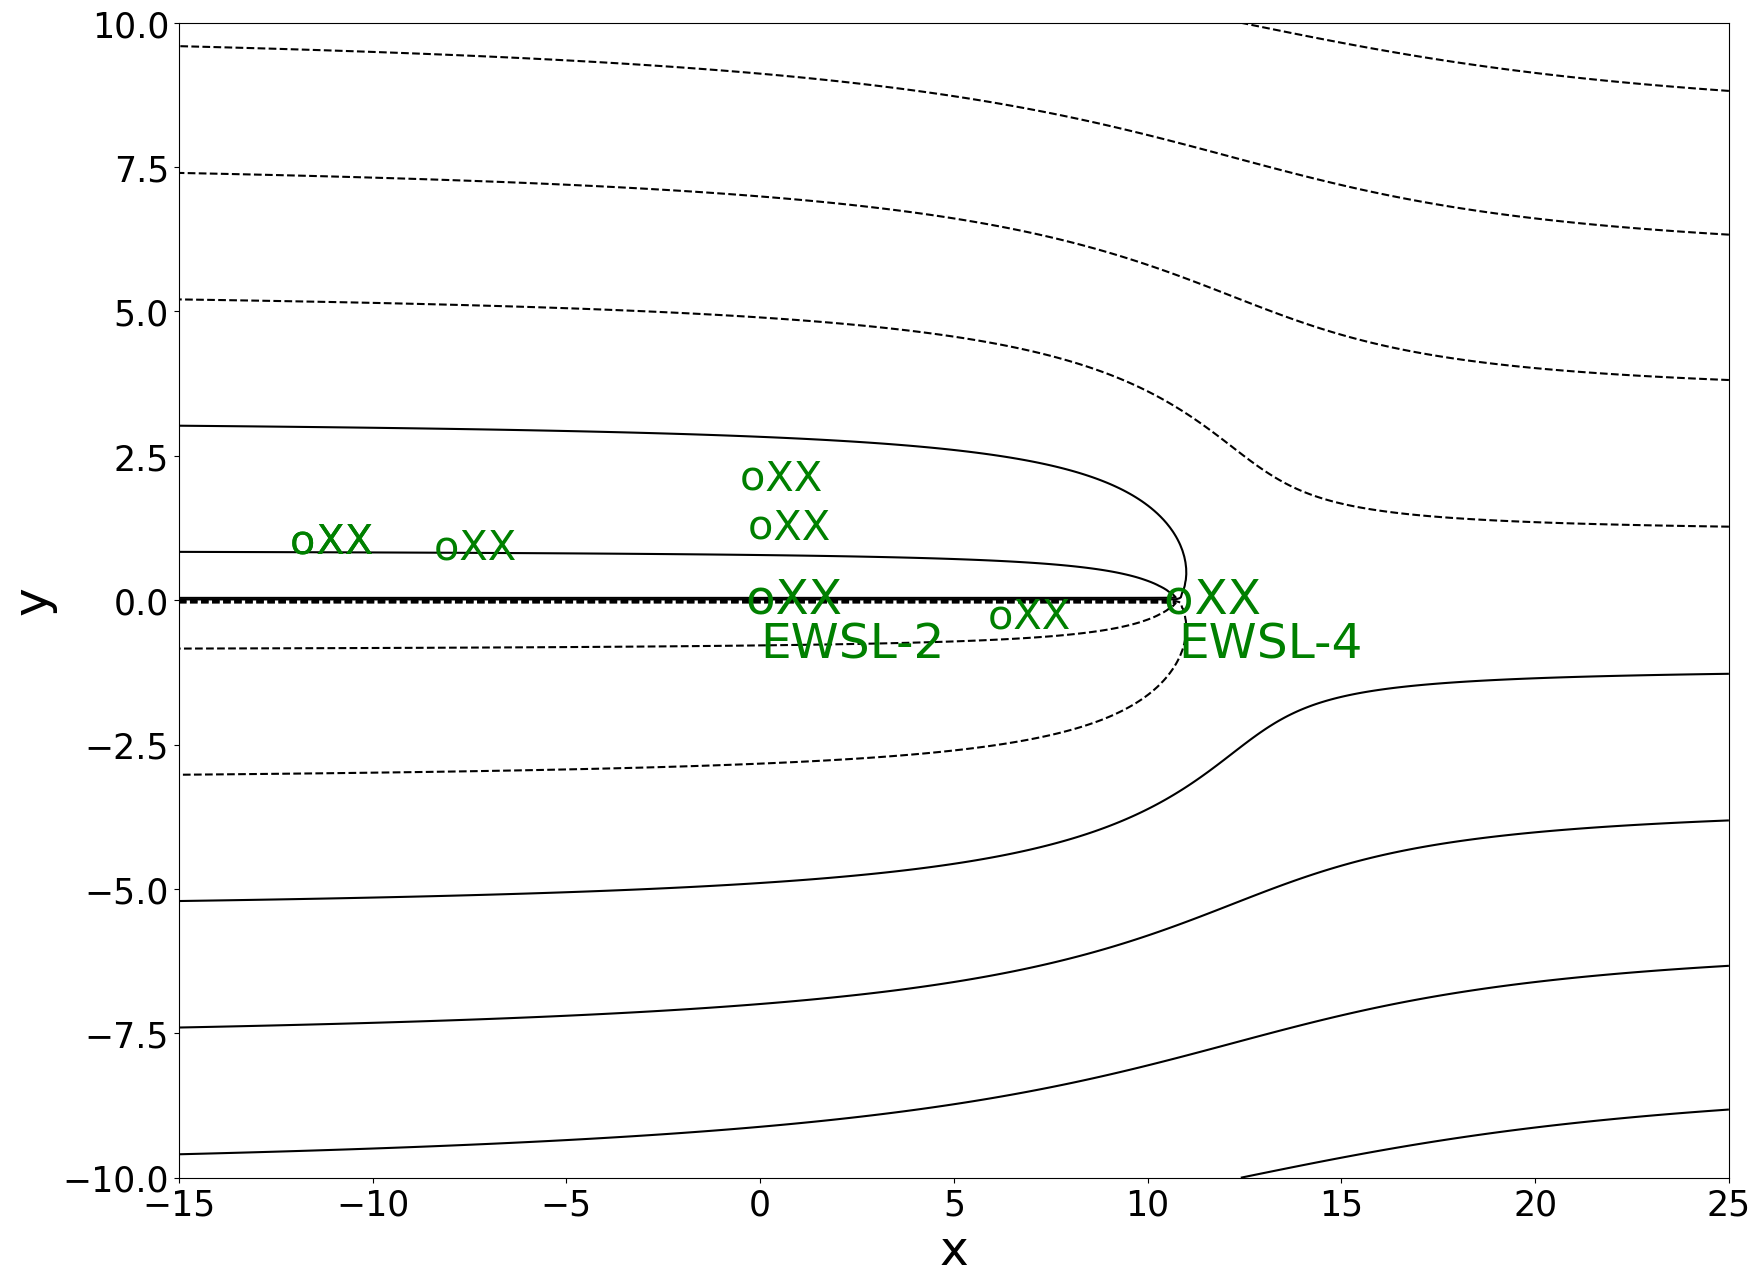

In [5]:
plt.figure(figsize=(20,15))
x = np.linspace(-15, 25, 500)
y = np.linspace(-10, 10, 200)
plt.xlim=[-15, 25]
plt.ylim=[-10,10]
k=1
k0=-.145
c=717
X, Y = np.meshgrid(x, y)
#Z = k0*X+.3*k*.5*np.log(Y**2+X**2)+.2*k*.5*np.log(Y**2+(X-10.8)**2)+c
#contours=plt.contour(X, Y, Z, levels=np.linspace(700,800,600), colors='red')
Z1 = k0*Y+0*k*np.arctan2(Y,X)+.2*k*np.arctan2(Y,(X-10.8))
contours=plt.contour(X, Y, Z1, levels=np.linspace(-200,200,1200), colors='black')
plt.gca().tick_params(labelsize=25)
#plt.clabel(contours, inline=True, fontsize=15)
#plot action level (XX) locations
plt.text(0,0,' XX',fontsize=35,color='g', verticalalignment='center')
plt.text(0,0,'o',fontsize=35,color='g', verticalalignment='center',horizontalalignment='center')
plt.text(0,1.25,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(0,1.25,'o',fontsize=30,color='g', verticalalignment='center',horizontalalignment='center')
plt.text(-.2,2.1,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(-.2,2.1,'o',fontsize=30,color='g', verticalalignment='center',ha='center')
plt.text(6.2,-.3,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(6.2,-.3,'o',fontsize=30,color='g', verticalalignment='center',ha='center')
plt.text(-8.1,.9,'o',fontsize=30,color='g', verticalalignment='center',ha='center')
plt.text(-8.1,.9,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(-11.8,1,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(-11.8,1,'o',fontsize=30,color='g', verticalalignment='center',ha='center')
plt.text(-11.8,1,' XX',fontsize=30,color='g', verticalalignment='center')
plt.text(-11.8,1,'o',fontsize=30,color='g', verticalalignment='center',ha='center')
plt.text(10.8,0,' XX',fontsize=35,color='green', verticalalignment='center')
plt.text(10.8,0,'o',fontsize=35,color='green', verticalalignment='center',ha='center')
#add labels
plt.xlabel('x',size='35')
plt.ylabel('y',size='35')
plt.text(0,-1,'EWSL-2',fontsize=35,color='g')
plt.text(10.8,-1,'EWSL-4',fontsize=35,color='green')
plt.savefig('Inefficientsystem.png')

### Exercise

```{admonition} Exercise 2 (Sensitivity Analysis)

a)  At what point does the 3k:2k system become ineffective? 
    
b) At what point does the 3k:2k system become inefficient?

c)  How does reversing the strength ratio to 2k:3k affect the critical value $𝑘=𝑘^∗$ at which the system becomes ineffective?

d) How does reversing the strength ratio to 2k:3k affect the critical value $k=\hat{k}$ at which the system becomes ineffecient?


```